In [3]:
# Import library yang dibutuhkan
import os
import json
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mr.ekoteguh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Download datasets yang dibutuhkan
import gdown

gdown.download('https://drive.google.com/uc?id=1qity4c0VQyNkoxIiGDU6AUebmi6vmzTf')

Downloading...
From: https://drive.google.com/uc?id=1qity4c0VQyNkoxIiGDU6AUebmi6vmzTf
To: /Users/mr.ekoteguh/Developments/bootcamps/ai-training-series-ui-ir/day-01/datasets.zip
100%|██████████| 1.04M/1.04M [00:00<00:00, 6.87MB/s]


'datasets.zip'

In [7]:
# Unzip file
!unzip datasets.zip

Archive:  datasets.zip
  inflating: Korpus.json             
  inflating: Korpus_Ringkas.json     


In [8]:
# Baca datasets
with open('Korpus.json') as f:
    corpus = json.load(f)

# Ubah ke dalam bentuk DataFrame
corpus_df = pd.DataFrame(corpus)
corpus_df.head()

section  articleid articletype           createdate         author  \
0        ekonomi     548551  singlepage  2020-09-20 12:18:07      BPH Migas   
1       nasional     548550  singlepage  2020-09-20 12:17:24  CNN Indonesia   
2  internasional     548512  singlepage  2020-09-20 09:45:28         author   
3      teknologi     548509  singlepage  2020-09-20 08:52:22         author   
4        hiburan     548507  singlepage  2020-09-20 08:09:35         author   

                                       originalTitle  \
0       BPH Migas-Pertamina Akan Bangun SPBN di Krui   
1  GNPF Ulama Sumut Galang Petisi Tunda Pilkada 2020   
2       AS Tunda Larangan TikTok Hingga 27 September   
3               Penyebab Transmisi Matic Mobil Lemot   
4  Felicity Jones Kenang Sosok Hakim Agung AS Rut...   

                                                 tag  \
0                                     bph migas|krui   
1  pilkada medan|pilkada medan 2020|gnpf ulama|sumut   
2             amerika serikat|tiktok|larangan tiktok   
3  konsultasi otomotif|cara menggunakan transmisi...   
4  felicity jones|ruth bader ginsburg|ruth bader ...   

                                            keywords            subsection  \
0                                    bph migas, krui          Ragam Energi   
1  pilkada medan, pilkada medan 2020, gnpf ulama,...      Berita Peristiwa   
2           amerika serikat, tiktok, larangan tiktok  Berita Eropa Amerika   
3  konsultasi otomotif, cara menggunakan transmis...        Ragam Otomotif   
4  felicity jones, ruth bader ginsburg, ruth bade...          Berita Seleb   

                                             content  
0  Kepala BPH Migas M. Fashurullah Asa mengadakan...  
1  Gerakan Nasional Pengawal Fatwa (GNPF) Ulama S...  
2  Kementerian Perdagangan Amerika Serikat mengum...  
3  Pertanyaan: Apa penyebab transmisi matic mobil...  
4  Aktris Felicity Jones turut mengenang sosok Ha...

### Exploratory Data

In [13]:
# Explore datasets

# 1. Mengetahui ukuran dari corpus_df
print(corpus_df.shape)

# 2. Mengetahui jumlah section yang unik
sections = corpus_df['section']
sections_unik = sections.unique()
print(f'JUMLAH SECTION UNIK: ' + str(len(sections_unik)))
print(sections_unik)

# 3. Mengetahui jumlah author dan article type yang unik
authors = corpus_df['author']
article_types = corpus_df['articletype']
authors_unik = authors.unique()
article_types_unik = article_types.unique()
print('JUMLAH AUTHOR UNIK: ' + str(len(authors_unik)))
print('JUMLAH ARTICLE TYPE UNIK: ' + str(len(article_types_unik)))

# 4. Mengetahui jumlah dokumen per section
print(sections.value_counts())

(1051, 10)
JUMLAH SECTION UNIK: 6
['ekonomi' 'nasional' 'internasional' 'teknologi' 'hiburan' 'olahraga']
JUMLAH AUTHOR UNIK: 68
JUMLAH ARTICLE TYPE UNIK: 1
nasional         430
ekonomi          180
olahraga         142
internasional    107
teknologi         97
hiburan           95
Name: section, dtype: int64


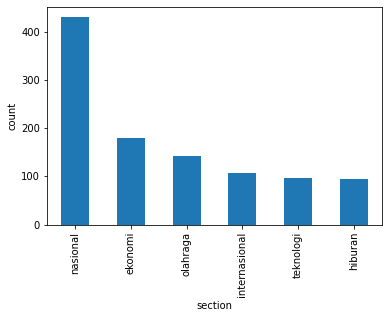

In [14]:
# 5. Visualisasi jumlah dokumen per section dalam bentuk bar
sections.value_counts().plot.bar(x='section', y='count')
plt.xlabel('section')
plt.ylabel('count')
plt.show()

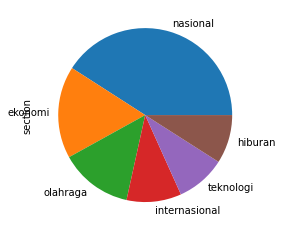

In [15]:
# 6. Visualisasi jumlah dokumen per section dalam bentuk pie chart
sections.value_counts().plot.pie()
plt.show()

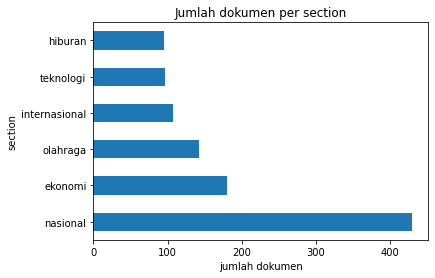

In [16]:
# 7. Visualisasi jumlah dokumen per section dalam bentuk horizontal bar
sections.value_counts().plot.barh()
plt.title('Jumlah dokumen per section')
plt.xlabel('jumlah dokumen')
plt.ylabel('section')
plt.show()

### Content Analysis

In [17]:
# 1. Tokenisasi text di setiap dokumen menggunakan NLTK
words_per_row = []

for index, row in tqdm(corpus_df.iterrows()):
    text = row['content'].lower()
    row_tokens = nltk.word_tokenize(text)

    # Cek apakah row_tokens tersebut hanya mengandung alfanumerik atau tidak
    # Note: Email bukan termasuk alfanumerik
    row_tokens = [x for x in row_tokens if x.isalnum()]
    words_per_row.append(row_tokens)

1051it [00:03, 263.56it/s]


In [18]:
# 2. Menghitung kata yang unik
# Salah satu caranya adalah dengan menyimpan kata-kata dari kalimat yang sudah do-tokenize
# ke dalam suatu dictionary/set

word_dict = {}

for row_tokens in tqdm(words_per_row):
    for token in row_tokens:
        if token in word_dict:
            word_dict[token] += 1
        else:
            word_dict[token] = 1

100%|██████████| 1051/1051 [00:00<00:00, 6465.50it/s]


In [19]:
# 3. Sorting word_dict berdasarkan frekuensi kemunculan katanya

word_dict = {k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1], reverse=True)}
print(word_dict)

# Tampilkan jumlah kata yang unik
print(len(word_dict))

{'yang': 8236, 'di': 7078, 'dan': 6740, 'itu': 3489, 'ini': 3391, 'dengan': 3371, 'untuk': 3272, 'dari': 3173, 'dalam': 2863, 'pada': 2616, 'akan': 2036, 'tidak': 1946, 'juga': 1893, 'tersebut': 1689, 'ada': 1414, 'saat': 1358, 'bisa': 1342, 'kata': 1282, 'ke': 1270, 'indonesia': 1136, 'atau': 1106, 'sudah': 1064, 'karena': 1053, 'menjadi': 1048, 'kasus': 1035, 'sebagai': 983, 'tahun': 966, 'persen': 961, 'jakarta': 961, 'ia': 958, 'lebih': 954, 'oleh': 917, 'dia': 914, 'telah': 907, 'pemerintah': 849, 'masih': 842, 'mereka': 840, 'orang': 826, 'bahwa': 811, 'mengatakan': 789, 'saya': 788, 'tak': 784, 'kepada': 774, 'satu': 765, 'namun': 743, 'kami': 723, 'kita': 719, 'baru': 716, 'kesehatan': 713, 'hanya': 708, '2020': 704, 'melakukan': 691, 'secara': 688, 'seperti': 686, 'hingga': 680, 'harus': 679, 'lalu': 675, 'adalah': 663, 'dki': 642, 'hal': 634, 'psbb': 633, 'hari': 626, 'dua': 619, 'setelah': 614, 'corona': 603, 'pilkada': 601, 'dilakukan': 597, 'negara': 590, 'daerah': 582, 's

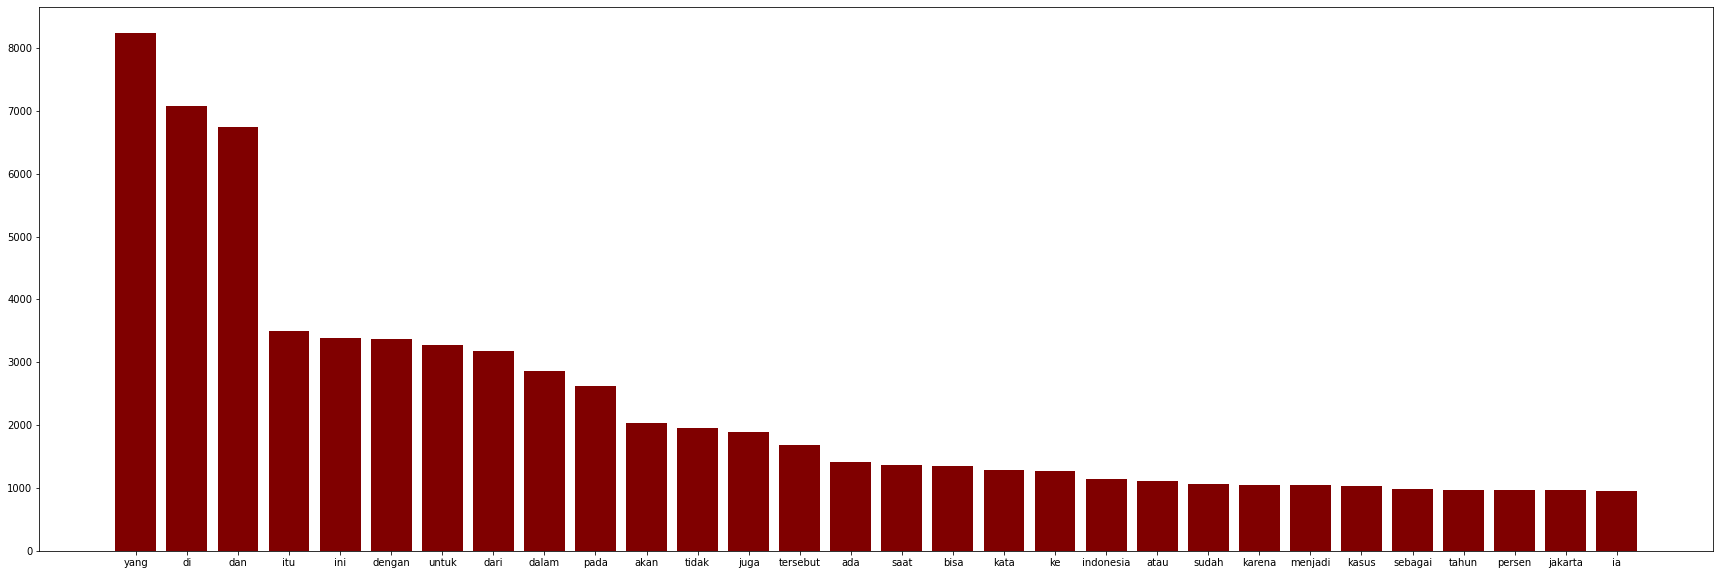

In [20]:
# 4. Visualisasi top 30 word_dict dalam bentuk histogram/bar chart

plt.figure(figsize=(30,10))
marker_x = list(word_dict.keys())[:30]
marker_y = [word_dict[i] for i in marker_x]
plt.bar(marker_x, marker_y, width=0.8, color='maroon')
plt.show()

In [21]:
# 5. Bigram = dua kata, menghitung bigram yang unik

bigram_dict = {}

for row_tokens in tqdm(words_per_row):
    bigrams = nltk.bigrams(row_tokens)
    for token in bigrams:
        if token in bigram_dict:
            bigram_dict[token] += 1
        else:
            bigram_dict[token] = 1


# Contoh bigram
print(list(bigram_dict.keys())[0])
print(list(word_dict.keys())[0])

100%|██████████| 1051/1051 [00:00<00:00, 2352.40it/s]

('kepala', 'bph')
yang


In [22]:
# 6. Sorting bigram dictionary berdasarkan kemunculan katanya

bigram_dict = {k: v for k, v in sorted(bigram_dict.items(), key=lambda item: item[1], reverse=True)}
print(bigram_dict)

# Tampilkan jumlah kata yang unik
print(len(bigram_dict))

{('saat', 'ini'): 557, ('dki', 'jakarta'): 447, ('virus', 'corona'): 436, ('salah', 'satu'): 319, ('selain', 'itu'): 257, ('rumah', 'sakit'): 252, ('di', 'indonesia'): 249, ('protokol', 'kesehatan'): 245, ('berada', 'di'): 232, ('gambas', 'video'): 211, ('video', 'cnn'): 211, ('di', 'jakarta'): 199, ('hal', 'itu'): 197, ('sementara', 'itu'): 197, ('kata', 'dia'): 197, ('hal', 'ini'): 196, ('timnas', 'indonesia'): 178, ('kasus', 'positif'): 170, ('di', 'tengah'): 168, ('yang', 'tidak'): 168, ('tidak', 'ada'): 168, ('yang', 'akan'): 154, ('amerika', 'serikat'): 154, ('yang', 'sudah'): 151, ('di', 'rumah'): 151, ('pilkada', 'serentak'): 142, ('hari', 'ini'): 142, ('yang', 'telah'): 141, ('wali', 'kota'): 137, ('dikutip', 'dari'): 136, ('gubernur', 'dki'): 136, ('pukul', 'wib'): 135, ('lebih', 'dari'): 134, ('kepala', 'daerah'): 133, ('psbb', 'total'): 131, ('di', 'bawah'): 130, ('persen', 'dari'): 128, ('yang', 'sama'): 127, ('tahun', 'ini'): 127, ('orang', 'yang'): 125, ('tahun', '2020')

In [23]:
# Apabila terlalu banyak bigram yang ditampilkan, bisa ditampilkan top 10

top10 = list(bigram_dict.keys())[:10]
for k in top10:
    print(str(k) + ' ' + str(bigram_dict[k]))

('saat', 'ini') 557
('dki', 'jakarta') 447
('virus', 'corona') 436
('salah', 'satu') 319
('selain', 'itu') 257
('rumah', 'sakit') 252
('di', 'indonesia') 249
('protokol', 'kesehatan') 245
('berada', 'di') 232
('gambas', 'video') 211


In [25]:
# 7. Menghitung panjang rata-rata konten

len_content_per_row = [len(words) for words in words_per_row]
print('PANJANG KONTEN PER ROW: ' + str(len_content_per_row))
print('PANJANG RATA2 DARI KONTEN: ' + str(sum(len_content_per_row)/len(len_content_per_row)))

PANJANG KONTEN PER ROW: [376, 377, 209, 189, 238, 254, 207, 567, 237, 254, 268, 326, 225, 317, 281, 350, 226, 405, 342, 274, 195, 223, 267, 300, 356, 142, 206, 244, 396, 215, 161, 187, 489, 208, 414, 286, 233, 347, 228, 228, 468, 247, 381, 243, 764, 245, 564, 301, 245, 685, 276, 425, 307, 128, 481, 192, 268, 269, 239, 589, 268, 504, 542, 339, 358, 233, 326, 286, 271, 160, 250, 703, 86, 407, 325, 485, 211, 154, 399, 200, 330, 457, 236, 195, 422, 442, 956, 246, 386, 231, 246, 431, 320, 434, 222, 247, 213, 333, 308, 496, 295, 247, 247, 446, 169, 347, 344, 208, 312, 257, 306, 287, 236, 229, 223, 434, 216, 285, 207, 334, 231, 213, 368, 292, 391, 323, 250, 300, 307, 178, 254, 408, 156, 418, 405, 341, 324, 221, 536, 292, 440, 398, 273, 221, 358, 289, 507, 302, 328, 260, 232, 269, 592, 318, 272, 322, 279, 198, 501, 304, 294, 325, 475, 243, 497, 254, 285, 192, 306, 319, 211, 371, 594, 246, 182, 347, 502, 380, 250, 387, 394, 229, 321, 802, 236, 420, 56, 198, 282, 232, 674, 307, 526, 229, 943, 33

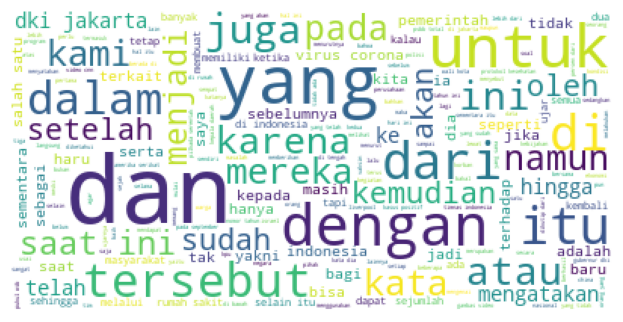

In [26]:
# 8. WordCloud

from wordcloud import WordCloud

all_contents_joined = ' '.join([' '.join(i) for i in words_per_row])
contents_wordcloud = WordCloud(background_color='white').generate(all_contents_joined)

plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(contents_wordcloud)
plt.axis('off')
plt.show()

### Title Analysis

In [27]:
# 1. Tokenisasi title

title_words_per_row = []

for index, row in tqdm(corpus_df.iterrows()):
    text = row['originalTitle'].lower()
    title_row_tokens = nltk.word_tokenize(text)
    title_row_tokens = [x for x in title_row_tokens if x.isalnum()]
    title_words_per_row.append(title_row_tokens)

1051it [00:00, 2503.04it/s]


In [28]:
# 2. Menghitung kata yang unik dalam title

title_word_dict = {}

for title_row_tokens in tqdm(title_words_per_row):
    for token in title_row_tokens:
        if token in title_word_dict:
            title_word_dict[token] += 1
        else:
            title_word_dict[token] = 1

# Tampilkan dictionary dari title
print(title_word_dict)
# Jumlah kata yang unik
print('JUMLAH KATA YANG UNIK DALAM TITLE: ' + str(len(title_word_dict)))

100%|██████████| 1051/1051 [00:00<00:00, 223053.86it/s]

{'bph': 1, 'akan': 23, 'bangun': 7, 'spbn': 1, 'di': 234, 'krui': 1, 'gnpf': 1, 'ulama': 7, 'sumut': 4, 'galang': 1, 'petisi': 3, 'tunda': 13, 'pilkada': 72, '2020': 27, 'as': 38, 'larangan': 1, 'tiktok': 4, 'hingga': 12, '27': 2, 'september': 26, 'penyebab': 4, 'transmisi': 1, 'matic': 1, 'mobil': 7, 'lemot': 1, 'felicity': 1, 'jones': 2, 'kenang': 3, 'sosok': 4, 'hakim': 4, 'agung': 3, 'ruth': 1, 'ginsburg': 2, 'meninggal': 8, 'trump': 14, 'utamakan': 2, 'wanita': 2, 'jadi': 26, 'dubes': 5, 'ri': 21, 'untuk': 30, 'bakal': 25, 'perkuat': 3, 'hubungan': 6, 'bilateral': 1, 'prediksi': 5, 'motogp': 23, 'emilia': 6, 'romagna': 6, '5': 13, 'fakta': 8, 'unik': 2, 'kekalahan': 3, 'mu': 8, 'dari': 38, 'crystal': 1, 'palace': 3, 'hasil': 11, 'liga': 13, 'inggris': 9, 'arsenal': 5, 'bekuk': 1, 'west': 2, 'ham': 2, 'cabut': 2, 'gigi': 1, 'atas': 3, 'hoverboard': 1, 'dokter': 4, 'alaska': 1, 'dipenjara': 1, 'kpu': 22, 'sebut': 26, 'pemerintah': 26, 'terbitkan': 1, 'perppu': 4, 'baru': 44, 'dkpp':

In [29]:
# 3. Sorting dictionary berdasarkan kemunculan kata

title_word_dict = {k: v for k, v in sorted(title_word_dict.items(), key=lambda item: item[1], reverse=True)}
print(title_word_dict)

{'di': 234, 'corona': 82, 'dan': 81, 'psbb': 74, 'pilkada': 72, 'tak': 65, 'ke': 54, 'dki': 48, 'baru': 44, 'kasus': 44, 'indonesia': 43, 'anies': 43, 'positif': 39, 'minta': 39, 'as': 38, 'dari': 38, 'covid': 37, 'total': 34, 'soal': 32, 'yang': 31, 'untuk': 30, 'timnas': 30, 'jakarta': 30, 'china': 30, 'saat': 29, 'jokowi': 29, '2020': 27, 'september': 26, 'jadi': 26, 'sebut': 26, 'pemerintah': 26, 'polisi': 26, 'bakal': 25, 'akan': 23, 'motogp': 23, 'vaksin': 23, 'bisa': 23, 'kpu': 22, 'hari': 22, 'persen': 22, 'ri': 21, 'pandemi': 21, 'dengan': 21, 'syekh': 20, 'ali': 20, 'jaber': 20, 'jelang': 20, 'usai': 19, 'ada': 19, 'ekonomi': 19, 'juta': 18, '4': 17, 'film': 17, '2021': 17, 'ini': 17, 'dua': 17, 'mulai': 16, 'karena': 16, 'konser': 16, 'buka': 16, 'dunia': 16, 'daerah': 16, 'pasien': 15, 'harga': 15, 'israel': 15, 'dpr': 15, 't': 15, 'calon': 15, 'trump': 14, 'ribu': 14, 'liverpool': 14, 'tolak': 14, 'lawan': 14, 'tunda': 13, '5': 13, 'liga': 13, 'warga': 13, 'kpk': 13, 'prot

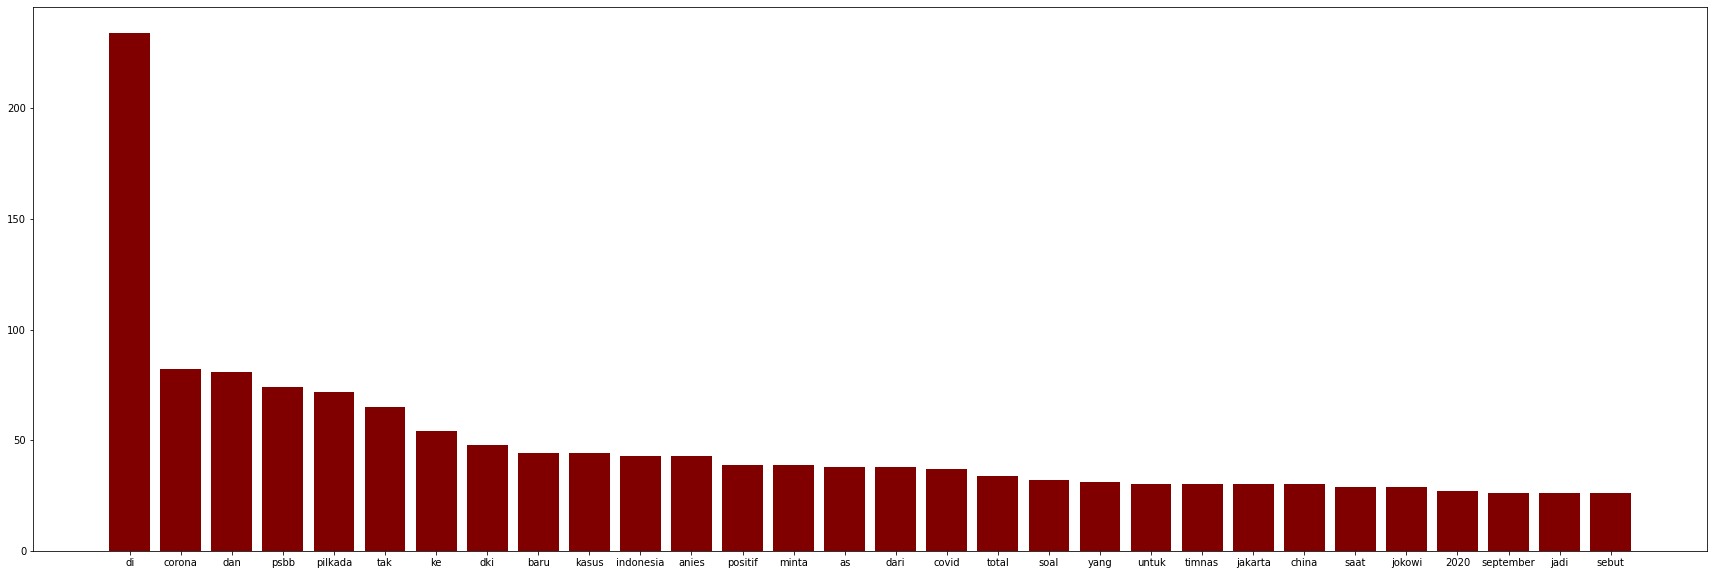

In [30]:
# 4. Visualisasikan top 30 kata unik yang sering muncul di dalam dictionary

plt.figure(figsize=(30,10))
marker_x = list(title_word_dict.keys())[:30]
marker_y = [title_word_dict[i] for i in marker_x]

plt.bar(marker_x, marker_y, width=0.8, color='maroon')
plt.show()

In [31]:
# 5. Menghitung panjang rata-rata dari title

len_title_per_row = [len(title_words) for title_words in title_words_per_row]
print('PANJANG JUDUL TIAP ROW: ' + str(len_title_per_row))
print('RATA2 PANJANG JUDUL: ' + str(sum(len_title_per_row)/len(len_title_per_row)))

PANJANG JUDUL TIAP ROW: [6, 8, 7, 5, 9, 9, 8, 5, 8, 7, 9, 8, 9, 7, 6, 8, 8, 8, 5, 9, 11, 10, 8, 9, 9, 11, 7, 7, 9, 8, 7, 7, 7, 9, 10, 9, 7, 5, 7, 9, 9, 9, 9, 7, 9, 10, 7, 10, 9, 8, 8, 9, 10, 9, 9, 8, 9, 7, 8, 8, 7, 8, 11, 9, 10, 9, 10, 8, 7, 5, 8, 7, 5, 8, 9, 8, 7, 9, 7, 7, 7, 9, 9, 6, 8, 7, 4, 8, 6, 5, 9, 9, 7, 9, 7, 10, 6, 9, 10, 9, 7, 7, 6, 10, 9, 5, 9, 10, 8, 6, 8, 9, 9, 6, 8, 11, 8, 9, 8, 9, 7, 9, 8, 6, 8, 9, 10, 7, 10, 8, 9, 10, 9, 8, 4, 7, 10, 8, 10, 10, 7, 10, 10, 8, 7, 6, 9, 9, 9, 9, 7, 7, 8, 8, 8, 7, 7, 7, 9, 8, 3, 9, 7, 6, 9, 6, 9, 7, 8, 8, 8, 7, 7, 9, 7, 8, 8, 8, 9, 9, 7, 7, 11, 8, 9, 7, 5, 8, 7, 9, 9, 10, 9, 8, 6, 8, 8, 7, 9, 8, 8, 11, 6, 9, 8, 9, 9, 7, 6, 9, 8, 9, 8, 10, 7, 9, 9, 10, 6, 12, 9, 10, 6, 7, 9, 9, 10, 9, 9, 9, 8, 10, 8, 11, 9, 6, 10, 8, 7, 11, 10, 9, 6, 6, 7, 9, 10, 9, 8, 8, 8, 9, 9, 9, 8, 7, 4, 7, 9, 9, 5, 9, 7, 7, 9, 7, 8, 7, 10, 8, 9, 6, 9, 6, 9, 6, 8, 6, 9, 8, 7, 8, 8, 9, 8, 8, 7, 6, 9, 5, 8, 10, 7, 7, 7, 9, 8, 8, 5, 9, 9, 7, 9, 10, 9, 9, 8, 7, 7, 9, 7, 7,

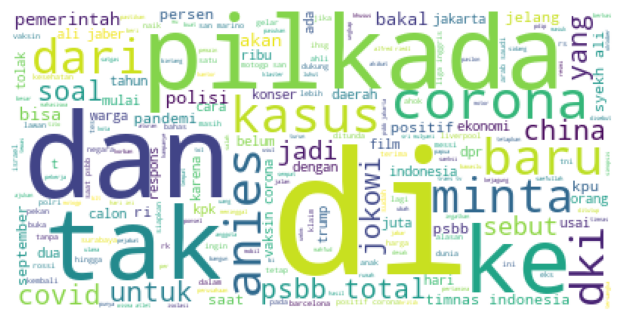

In [32]:
# 6. Wordcloud

all_titles_joined = ' '.join([' '.join(i) for i in title_words_per_row])
titles_wordcloud = WordCloud(background_color='white').generate(all_titles_joined)

plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(titles_wordcloud)
plt.axis('off')
plt.show()

### Regular Expression (RegEx)

In [33]:
# Import library
import re

In [34]:
# Sample
text = "Joko Widodo makan nasi goreng bersama Joe Biden di AEON Tangerang A B C."

# q: bagaimana caranya kita bisa mendapatkan token berhuruf kapital di depan saja?
pattern = '[A-Z][a-z]+'

re.findall(pattern, text)

['Joko', 'Widodo', 'Joe', 'Biden', 'Tangerang']

In [35]:
text = "Joko Widodo makan     nasi \n goreng bersama Joe Biden di AEON Tangerang A B C."

# q: bagaimana cara mendapatkan token berhuruf kecil semuanya
pattern = '(?<=\s)[a-z]+'

re.findall(pattern, text)

['makan', 'nasi', 'goreng', 'bersama', 'di']

In [36]:
text = "anjing hitam dan kucing hitam."

# q: mendapatkan alfanumerik dan underscore tapi dibatasi hanya 3 karakter saja
pattern = "[a-zA-Z0-9_]{3}"

re.findall(pattern,text)

['anj', 'ing', 'hit', 'dan', 'kuc', 'ing', 'hit']

In [37]:
text = "Fasilkom punya website http://cs.ui.ac.id. Prof. Belawati Wijaya bekerja di Fasilkom UI."

# katakanlah website boleh ada alfanumerik dan underscore
pattern = "(https?://(?:[a-zA-Z0-9_]+\.)+[a-zA-Z0-9_]+)" # mengambil alamat website

re.findall(pattern,text)

['http://cs.ui.ac.id']

In [38]:
# Cek email valid atau tidak

emails = [
        'pacil.keren@gmail.com', # harus match
        'pacil.keren@gmail', # harus tidak match
        'pacil.keren@cs.co.id', # harus match
        
        'irkeren49@cs2.u2i', # harus match
        'irkeren49@4cs2.ui2', # harus match
        'irkeren49--_@4cs2.ui--_2', # harus tidak match 
        'irkeren49$_@4cs2.ui--_2', # # harus tidak match
        'irkeren49@4cs2.%ui--_2', # harus tidak  match
        'alala@cs.ui__', # harus tidak match

        'ir.4.life@my-hobbies.uk.id-', # harus tidak match 
        'akun__ir@cs.ui__', # harus tidak match
        'akun-ir@gmail.com', # harus match

        'not$valid_@cs.ui', # harus tidak match 
        'm4ta_bat1n@magician__', # harus tidak match 
        'raiden-shogun-op@genshin.life.', # harus tidak match
]

In [45]:
def cek_email(k):
  p = '^(\w+)([\.-]\w+)*@[a-zA-Z0-9]+(-[a-zA-Z0-9]+)*(\.[a-zA-Z0-9]+(-[a-zA-Z0-9]+)*)+$'

  # general_p = '(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)'
  return re.match(p, k)

result = [cek_email(k) for k in emails]
result

[<re.Match object; span=(0, 21), match='pacil.keren@gmail.com'>,
 None,
 <re.Match object; span=(0, 20), match='pacil.keren@cs.co.id'>,
 <re.Match object; span=(0, 17), match='irkeren49@cs2.u2i'>,
 <re.Match object; span=(0, 18), match='irkeren49@4cs2.ui2'>,
 None,
 None,
 None,
 None,
 None,
 None,
 <re.Match object; span=(0, 17), match='akun-ir@gmail.com'>,
 None,
 None,
 None,
 <re.Match object; span=(0, 41), match='radityo-eko.prasojo.fasilkom-ui@gmail.com'>]

In [39]:
# Ada beberapa asumsi yang harus diikuti:
# Titik tidak boleh berulang: radityo.eko@gmail.com boleh, radityo..eko@gmail.com tidak
# Dash juga tidak boleh berulang: radityo-eko boleh, radityo--eko tidak
# Dash dan titik tidak boleh ada di akhir
# Khusus untuk domain tidak boleh ada underscore

email_pattern = '\s+((\w+)([\.-]\w+)*@[a-zA-Z0-9]+(-[a-zA-Z0-9]+)*(\.[a-zA-Z0-9]+(-[a-zA-Z0-9]+)*)+)'

text = 'email saya adalah pacilkeren@gmail.co.id dan email2@gmail.com.'

list_emails = re.findall(email_pattern, text)

print(list_emails[0][0])
print(list_emails[1][0])

pacilkeren@gmail.co.id
email2@gmail.com


In [46]:
# Menghitung kemunculan email dalam konten corpus

email_dict = {}
for index, row in tqdm(corpus_df.iterrows()):
  emails = re.findall(email_pattern, row['content'])
  for email in emails: 
    if email[0] in email_dict:
      email_dict[email[0]] += 1
    else:
      email_dict[email[0]] = 1

print(email_dict)

1051it [00:00, 1252.82it/s]

{'info@railink.co.id': 1, 'infopemilu.LHKPN@kpk.go.id': 1}


In [50]:
# lakukan hal yang sama untuk akun twitter/instagram

accounts = [
  '@iwuvu3000',
  '@the_king.ar',
  '@1panic__',
  '@info-retrieve',
  '@fake_soc_med_account',
  '@lulus2021.'
]

In [52]:
def cek_akun_sosmed(k):
  p = '(?<!\w)@[\w\.]{1,14}\w(?![\w-])'
  return re.match(p, k)

result = [cek_akun_sosmed(k) for k in accounts]
result

[<re.Match object; span=(0, 10), match='@iwuvu3000'>,
 <re.Match object; span=(0, 12), match='@the_king.ar'>,
 <re.Match object; span=(0, 9), match='@1panic__'>,
 None,
 None,
 <re.Match object; span=(0, 10), match='@lulus2021'>]

In [53]:
# Sample

text = 'Saya memiliki beberapa account @ , yaitu @iwuvu3000, @the_king.ar, @1panic__, @info-retrieve, @fake_soc_med_account, dan @lulus2021.'

account_pattern = '(?<!\w)@[\w\.]{1,14}\w(?![\w-])'

re.findall(account_pattern, text)

['@iwuvu3000', '@the_king.ar', '@1panic__', '@lulus2021']

In [55]:
# Menghitung kemunculan account dalam konten corpus

account_dict = {}
for index, row in tqdm(corpus_df.iterrows()):
  accounts = re.findall(account_pattern, row['content'])
  for account in accounts: 
    if account in account_dict:
      account_dict[account] += 1
    else:
      account_dict[account] = 1

print(account_dict)

1051it [00:00, 3915.07it/s]

{'@rr.irwin': 1, '@lambe_turah': 1, '@txtdaribogor': 1, '@listongs': 2, '@tirta_hudhi': 1, '@ridwankamil': 2, '@prakerja.go.id': 1, '@acmawards': 2, '@ito.kurnia': 1, '@firdzaradiany': 1, '@ganangsy': 1, '@tyonarie2': 1, '@MushinAshin3': 1, '@FerdinandHaean3': 1, '@basukibtp': 2, '@yasshh19': 1, '@cositadelanoche': 1, '@Aikaz_F': 2, '@commuterline': 3, '@prastow': 1, '@KPK_RI': 1, '@TMCPoldaMetro': 2, '@kemenkopukm': 1, '@putri_tanjung': 1, '@rizqiawal': 1, '@syekh.alijaber': 1, '@warung_jurnalis': 1, '@BennyHarmanID': 2, '@NetflixUK': 2, '@WallnerAndi': 1, '@jakarta.siana': 1, '@Aditt_hr': 2, '@adiw9237': 2, '@miztabay': 2, '@chandra_ds': 3, '@sbotv': 1, '@_KingPurwa': 1, '@boazsolossa': 1, '@abangriza': 1, '@m3takl_en': 1, '@infobekasi': 1, '@regureg': 1, '@Dwinamasayaa': 1, '@kaesangp': 1, '@HRimanti': 1, '@txtdaripooh': 1}


In [56]:
# Sorting account_dict

account_dict = {k: v for k, v in sorted(account_dict.items(), key=lambda item: item[1], reverse=True)}

In [57]:
# Print account_dict dan menghitung jumlah

print(account_dict)
print(len(account_dict))

{'@commuterline': 3, '@chandra_ds': 3, '@listongs': 2, '@ridwankamil': 2, '@acmawards': 2, '@basukibtp': 2, '@Aikaz_F': 2, '@TMCPoldaMetro': 2, '@BennyHarmanID': 2, '@NetflixUK': 2, '@Aditt_hr': 2, '@adiw9237': 2, '@miztabay': 2, '@rr.irwin': 1, '@lambe_turah': 1, '@txtdaribogor': 1, '@tirta_hudhi': 1, '@prakerja.go.id': 1, '@ito.kurnia': 1, '@firdzaradiany': 1, '@ganangsy': 1, '@tyonarie2': 1, '@MushinAshin3': 1, '@FerdinandHaean3': 1, '@yasshh19': 1, '@cositadelanoche': 1, '@prastow': 1, '@KPK_RI': 1, '@kemenkopukm': 1, '@putri_tanjung': 1, '@rizqiawal': 1, '@syekh.alijaber': 1, '@warung_jurnalis': 1, '@WallnerAndi': 1, '@jakarta.siana': 1, '@sbotv': 1, '@_KingPurwa': 1, '@boazsolossa': 1, '@abangriza': 1, '@m3takl_en': 1, '@infobekasi': 1, '@regureg': 1, '@Dwinamasayaa': 1, '@kaesangp': 1, '@HRimanti': 1, '@txtdaripooh': 1}
46


### Analisis `Korpus_Ringkas`

In [58]:
with open('Korpus_Ringkas.json') as f:
  corpus_ringkas = json.load(f)

In [59]:
corpus_ringkas_df = pd.DataFrame(corpus_ringkas)
corpus_ringkas_df.head()

id                                            content
0   0  MotoGP 2020akan memasuki seri ketujuh yang ber...
1   1  Pemerintah Provinsi DKI Jakarta menutup sement...
2   2  Ketua Komisi Pemilihan Umum (KPU)Arief Budiman...
3   3  Helikopter milik PT National Utility Helicopte...
4   4  Presiden Amerika Serikat Donald Trump dipastik...

In [60]:
# Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mr.ekoteguh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
# loading stopwords NLTK
stopwords = nltk.corpus.stopwords.words('indonesian')

In [62]:
# Import library Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [63]:
# Penggunaan Sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmer.stem("berlari")

'lari'

In [64]:
# Melakukan tokenisasi Korpus_Ringkas ke dalam bentuk lowercase

words_ringkas_per_row = []

for index, row in tqdm(corpus_ringkas_df.iterrows()):
  text = row['content'].lower()
  row_tokens = nltk.word_tokenize(text)
  # Cek apakah hanya mengandung alfanumberik atau tidak
  # Email bukan termasuk alfanumerik --> example@gmail.com
  row_tokens = [x for x in row_tokens if x.isalnum()]
  words_ringkas_per_row.append(row_tokens)

25it [00:00, 68.81it/s]


In [65]:
pattern_tandabaca = '[!?.,"\']'
pattern_angka = '[0-9]+'

filtered_words_ringkas = []

dict_stem = {}
for row in tqdm(words_ringkas_per_row):
  i = 0
  filtered_words_ringkas.append([])
  for token in row:
    if not re.match(pattern_tandabaca, token):
      if not re.match(pattern_angka, token):
        if token not in stopwords:
          if token not in dict_stem:
            dict_stem[token] = stemmer.stem(token) 
          filtered_words_ringkas[i].append(dict_stem[token])
  i += 1

100%|██████████| 25/25 [02:02<00:00,  4.91s/it]


In [66]:
# Menampilkan kata-kata unik yang sudah difilter tanda baca dan juga angka
print(filtered_words_ringkas[0])

['motogp', 'pasuk', 'seri', 'tujuh', 'tajuk', 'motogp', 'emilia', 'romagna', 'sirkuit', 'misano', 'minggu', 'malam', 'indonesia', 'maverick', 'vinales', 'tampil', 'pimpin', 'start', 'susul', 'jack', 'miller', 'fabio', 'quartararo', 'baris', 'depan', 'pekan', 'sirkuit', 'vinales', 'raih', 'pole', 'position', 'finis', 'peringkat', 'enam', 'franco', 'morbidelli', 'tampil', 'juara', 'prediksi', 'menang', 'motogp', 'emilia', 'romagna', 'versi', 'redaksi', 'olahraga', 'quartararo', 'menang', 'rossi', 'podium', 'haryanto', 'tri', 'wibowo', 'motogp', 'emilia', 'romagna', 'momen', 'fabio', 'quartararo', 'jalur', 'menang', 'alami', 'nasib', 'sial', 'el', 'diablo', 'bukti', 'layak', 'favorit', 'juara', 'dunia', 'motogp', 'raih', 'menang', 'motogp', 'emilia', 'romagna', 'quartararo', 'bilang', 'konsisten', 'pekan', 'raih', 'start', 'bagus', 'milik', 'kendala', 'sepeda', 'motor', 'm1', 'quartararo', 'layak', 'jago', 'raih', 'menang', 'saing', 'ketat', 'quartararo', 'balap', 'yamaha', 'duo', 'suzuki

In [72]:
# Menghitung kemunculan kata

ringkas_dict = {}

for word in filtered_words_ringkas[0]:
  if word in ringkas_dict:
    ringkas_dict[word] += 1
  else:
    ringkas_dict[word] = 1

print(ringkas_dict)

{'motogp': 16, 'pasuk': 2, 'seri': 5, 'tujuh': 2, 'tajuk': 1, 'emilia': 11, 'romagna': 10, 'sirkuit': 3, 'misano': 3, 'minggu': 5, 'malam': 6, 'indonesia': 19, 'maverick': 4, 'vinales': 14, 'tampil': 10, 'pimpin': 13, 'start': 4, 'susul': 5, 'jack': 3, 'miller': 8, 'fabio': 4, 'quartararo': 15, 'baris': 2, 'depan': 3, 'pekan': 13, 'raih': 8, 'pole': 3, 'position': 2, 'finis': 1, 'peringkat': 1, 'enam': 6, 'franco': 1, 'morbidelli': 1, 'juara': 5, 'prediksi': 7, 'menang': 15, 'versi': 2, 'redaksi': 1, 'olahraga': 1, 'rossi': 4, 'podium': 9, 'haryanto': 1, 'tri': 1, 'wibowo': 1, 'momen': 1, 'jalur': 6, 'alami': 3, 'nasib': 1, 'sial': 1, 'el': 1, 'diablo': 1, 'bukti': 3, 'layak': 3, 'favorit': 1, 'dunia': 7, 'bilang': 2, 'konsisten': 2, 'bagus': 3, 'milik': 24, 'kendala': 2, 'sepeda': 1, 'motor': 1, 'm1': 1, 'jago': 1, 'saing': 3, 'ketat': 6, 'balap': 19, 'yamaha': 2, 'duo': 1, 'suzuki': 1, 'alex': 1, 'rins': 1, 'joan': 1, 'mir': 1, 'valentino': 2, 'posisi': 11, 'tiga': 12, 'bagnaia': 8, 

In [73]:
# Sorting ringkas_dict

ringkas_dict = {k: v for k, v in sorted(ringkas_dict.items(), key=lambda item: item[1], reverse=True)}

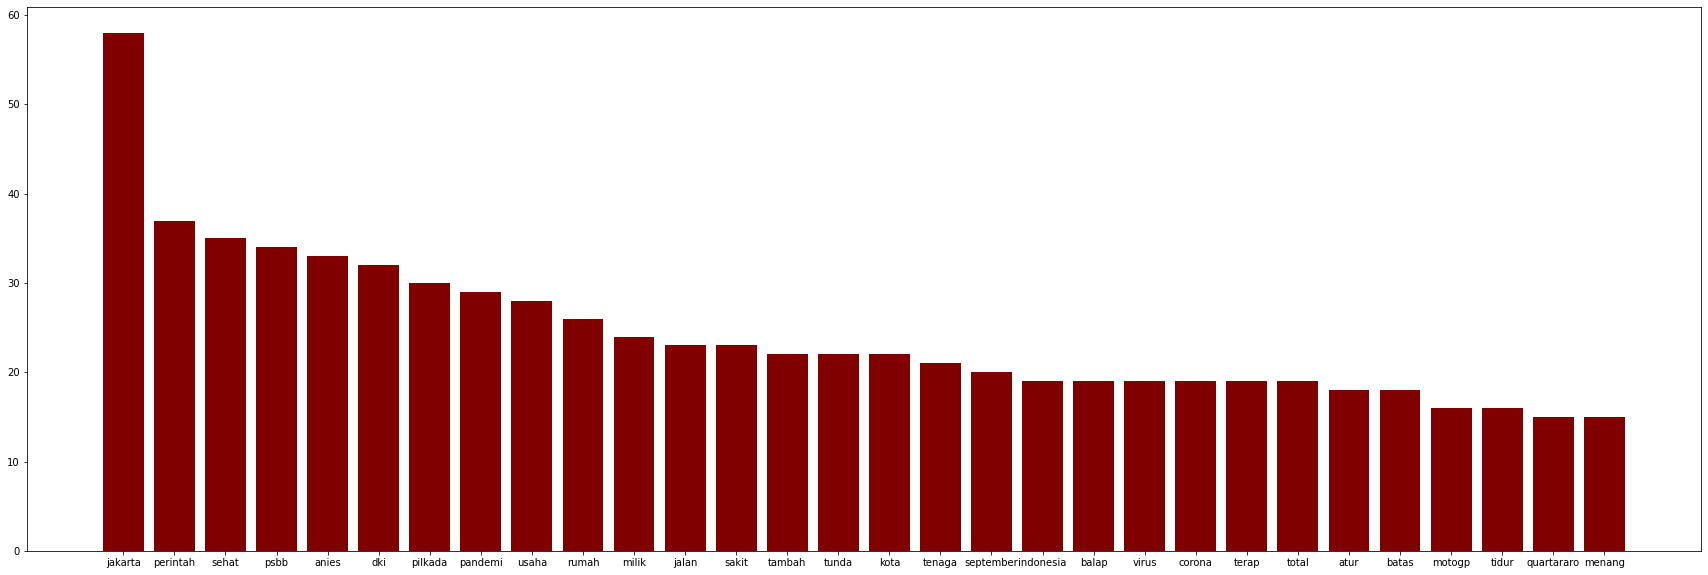

In [74]:
# Menampilkan 30 kata yang sering muncul

plt.figure(figsize=(30,10))
marker_x = list(ringkas_dict.keys())[:30]
marker_y = [ringkas_dict[i] for i in marker_x]

plt.bar(marker_x, marker_y, width=0.8, color='maroon')
plt.show()

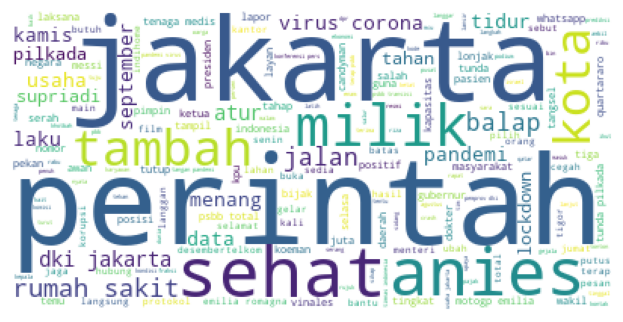

In [78]:
# Membuat wordcloud

all_ringkas_joined = ' '.join(filtered_words_ringkas[0])
ringkas_wordcloud = WordCloud(background_color='white').generate(all_ringkas_joined)

plt.figure(figsize=(8,4), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(ringkas_wordcloud)
plt.axis('off')
plt.show()